In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import os
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '3'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import time
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.reshape(60000, 784) 
xtrain = xtrain.astype(np.float32)
xtrain /= 255
xtest = xtest.reshape(10000, 784)
xtest = xtest.astype(np.float32)
xtest/= 255
# Number of classes, one class for each of 10 digits.
num_classes = 10
ytest = np_utils.to_categorical(ytest,num_classes)
ytrain = np_utils.to_categorical(ytrain,num_classes)

Using TensorFlow backend.


In [6]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(3, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(3))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
# using SGD
SGD = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 71s - loss: 1.1466 - acc: 0.6102 - val_loss: 0.8094 - val_acc: 0.7525
Epoch 2/20
 - 68s - loss: 0.7574 - acc: 0.7669 - val_loss: 0.7196 - val_acc: 0.7796
Epoch 3/20
 - 61s - loss: 0.6972 - acc: 0.7828 - val_loss: 0.7173 - val_acc: 0.7706
Epoch 4/20
 - 67s - loss: 0.6778 - acc: 0.7876 - val_loss: 0.6848 - val_acc: 0.7938
Epoch 5/20
 - 66s - loss: 0.6720 - acc: 0.7883 - val_loss: 0.6379 - val_acc: 0.8044
Epoch 6/20
 - 64s - loss: 0.6652 - acc: 0.7905 - val_loss: 0.6555 - val_acc: 0.7940
Epoch 7/20
 - 63s - loss: 0.6617 - acc: 0.7937 - val_loss: 0.6651 - val_acc: 0.8009
Epoch 8/20
 - 66s - loss: 0.6596 - acc: 0.7961 - val_loss: 0.6879 - val_acc: 0.7893
Epoch 9/20
 - 67s - loss: 0.6569 - acc: 0.7960 - val_loss: 0.6639 - val_acc: 0.7978
Epoch 10/20
 - 68s - loss: 0.6569 - acc: 0.7963 - val_loss: 0.6387 - val_acc: 0.8048
Epoch 11/20
 - 50s - loss: 0.6539 - acc: 0.7947 - val_loss: 0.6653 - val_acc: 0.7998
Epoch 12/20
 - 21s - los

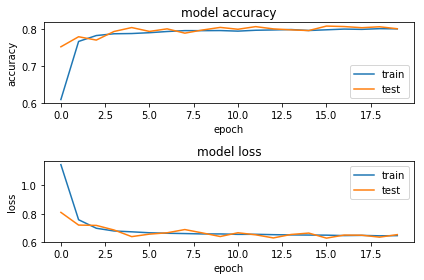

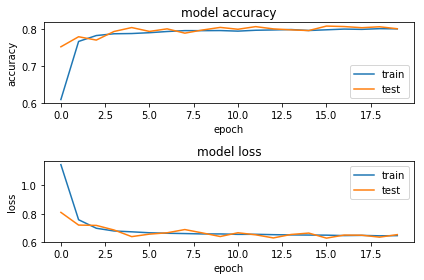

In [7]:
# training the model 
start = time.time()
history = model.fit(xtrain, ytrain, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
# using SGD
SGD = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=SGD)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 33s - loss: 0.3267 - acc: 0.9021 - val_loss: 0.1751 - val_acc: 0.9465
Epoch 2/20
 - 29s - loss: 0.1578 - acc: 0.9518 - val_loss: 0.1441 - val_acc: 0.9563
Epoch 3/20
 - 31s - loss: 0.1242 - acc: 0.9618 - val_loss: 0.1230 - val_acc: 0.9633
Epoch 4/20
 - 30s - loss: 0.1055 - acc: 0.9684 - val_loss: 0.1326 - val_acc: 0.9603
Epoch 5/20
 - 29s - loss: 0.0943 - acc: 0.9709 - val_loss: 0.1165 - val_acc: 0.9647
Epoch 6/20
 - 29s - loss: 0.0857 - acc: 0.9737 - val_loss: 0.1075 - val_acc: 0.9675
Epoch 7/20
 - 29s - loss: 0.0780 - acc: 0.9758 - val_loss: 0.1070 - val_acc: 0.9693
Epoch 8/20
 - 29s - loss: 0.0717 - acc: 0.9776 - val_loss: 0.1139 - val_acc: 0.9664
Epoch 9/20
 - 29s - loss: 0.0670 - acc: 0.9793 - val_loss: 0.1169 - val_acc: 0.9679
Epoch 10/20
 - 29s - loss: 0.0620 - acc: 0.9806 - val_loss: 0.1211 - val_acc: 0.9658
Epoch 11/20
 - 29s - loss: 0.0579 - acc: 0.9819 - val_loss: 0.1177 - val_acc: 0.9680
Epoch 12/20
 - 29s - los

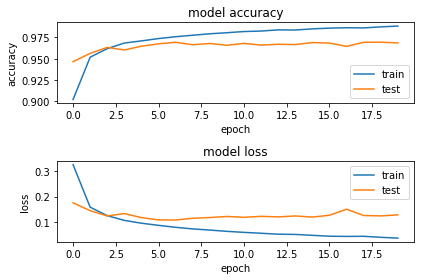

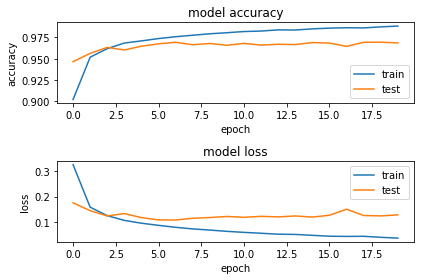

In [9]:
# training the model 
start = time.time()
history = model.fit(xtrain, ytrain, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig